In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load dataset
data=pd.read_csv('Country-data.csv')
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [5]:
# Lets set country as index
data.set_index('country',inplace=True)

In [6]:
data.head()

child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  
country                                            
Afghanistan                56.2       5.82    553  
Albania                    76.3       1.65   4090  
Algeria                    76.5       2.89   4460  
Angola                     60.1       6.16   3530  
Antigua and Barbuda        76.8       2.13  12200

In [7]:
# Shape of the Dataset
print('No of Rows : ',data.shape[0])
print('No of Columns : ',data.shape[1])


No of Rows :  167
No of Columns :  9


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


### Descriptive Statistics

In [9]:
data.describe().T

count          mean           std       min       25%      50%  \
child_mort  167.0     38.270060     40.328931    2.6000     8.250    19.30   
exports     167.0     41.108976     27.412010    0.1090    23.800    35.00   
health      167.0      6.815689      2.746837    1.8100     4.920     6.32   
imports     167.0     46.890215     24.209589    0.0659    30.200    43.30   
income      167.0  17144.688623  19278.067698  609.0000  3355.000  9960.00   
inflation   167.0      7.781832     10.570704   -4.2100     1.810     5.39   
life_expec  167.0     70.555689      8.893172   32.1000    65.300    73.10   
total_fer   167.0      2.947964      1.513848    1.1500     1.795     2.41   
gdpp        167.0  12964.155689  18328.704809  231.0000  1330.000  4660.00   

                 75%        max  
child_mort     62.10     208.00  
exports        51.35     200.00  
health          8.60      17.90  
imports        58.75     174.00  
income      22800.00  125000.00  
inflation      10.75     104.00  
life_expec     76.80      82.80  
total_fer       3.88       7.49  
gdpp        14050.00  105000.00

<Axes: >

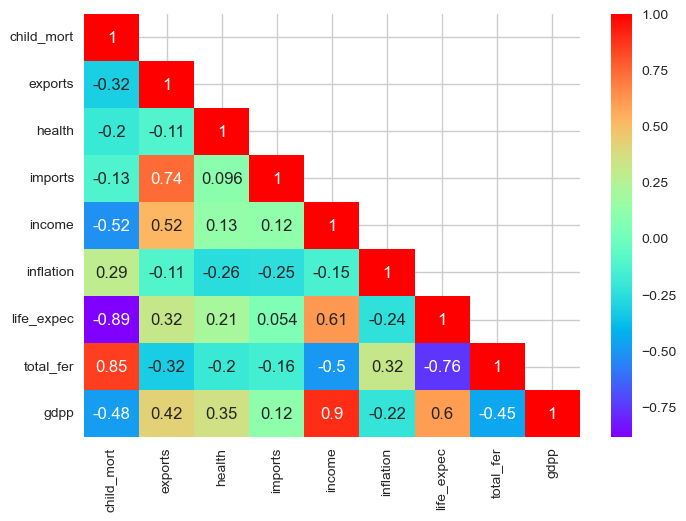

In [10]:
sns.heatmap(data.corr(),annot=True,cmap='rainbow',mask=np.triu(data.corr(),k=1))

### Visualization

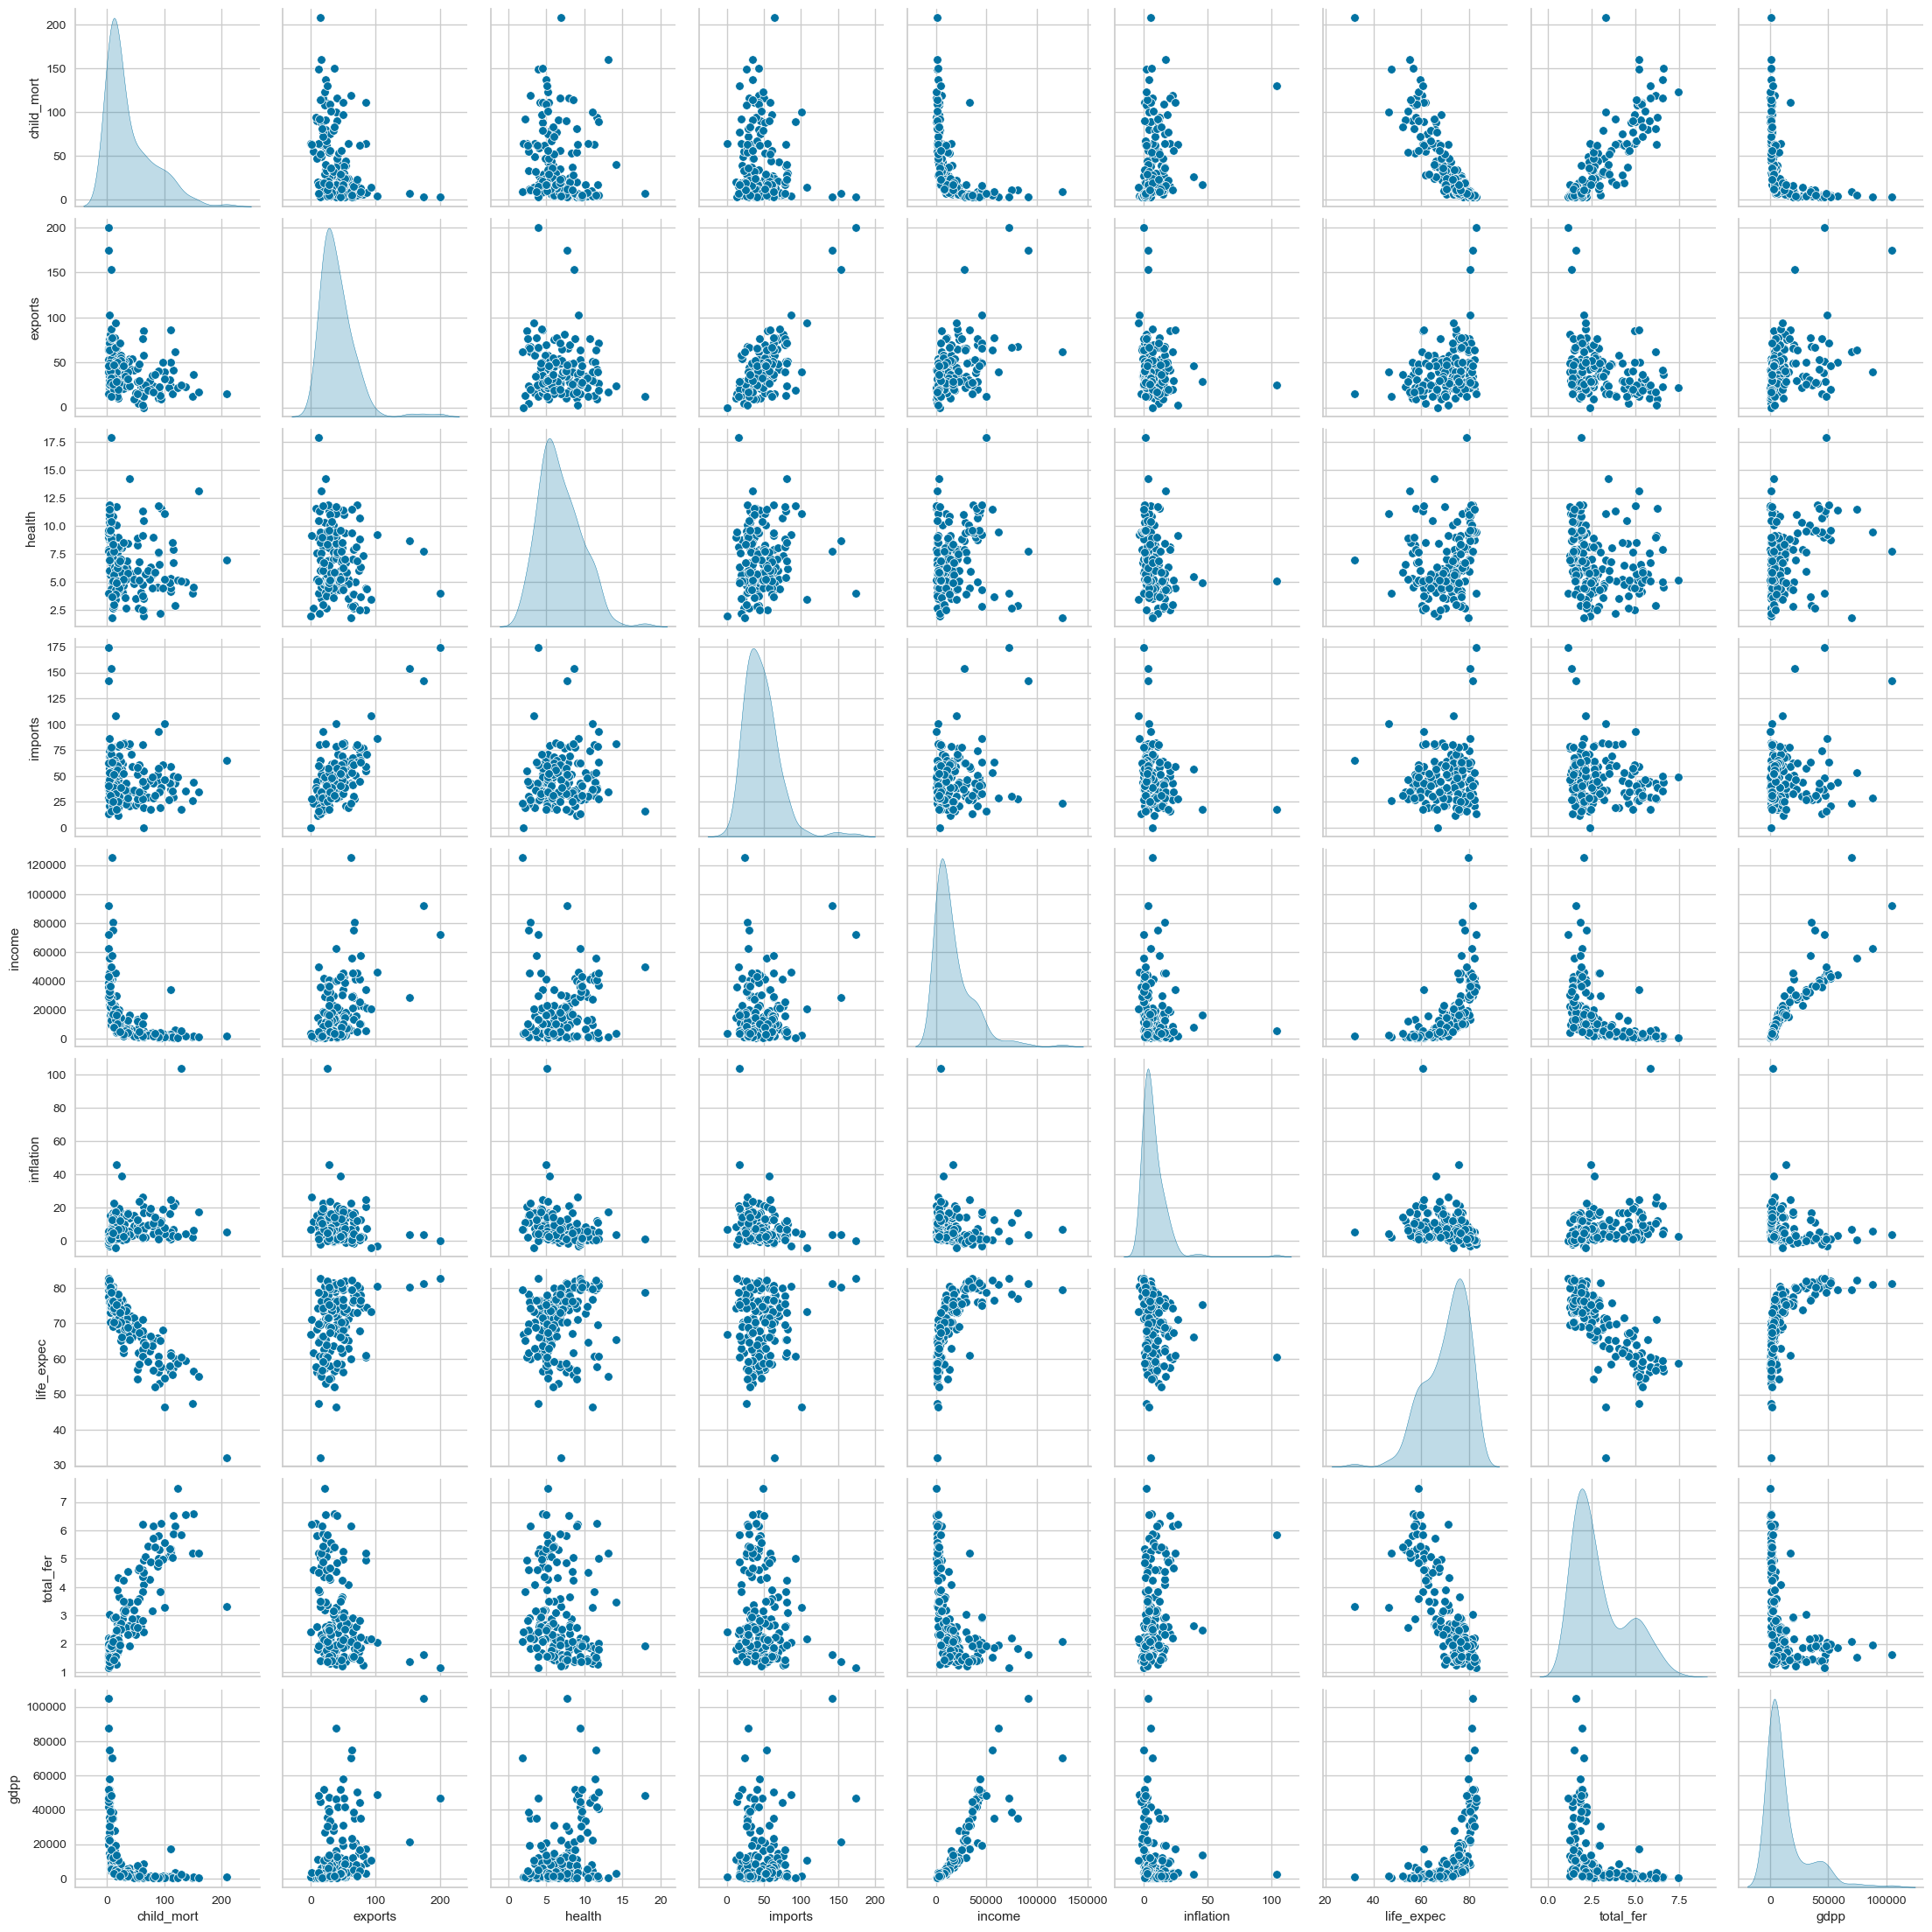

In [11]:
sns.pairplot(data=data,diag_kind='kde')
plt.show()

In [12]:
## all are right skew expect life_expec

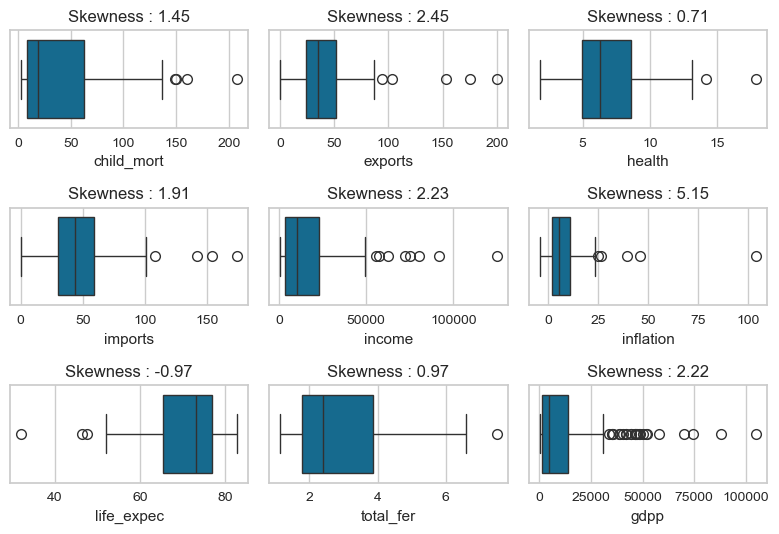

In [13]:
### Boxplot:
t=1
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,x=i)
    plt.title(f'Skewness : {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

### Data Preprocessing

In [14]:
## Lets check missing values
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [15]:
# Check duplicates
data.duplicated().sum()

0

In [16]:
# treat outliers 
# lets cap the extreme outliers lets go with 2*iqr
for i in data.columns:
    q1,q3=np.quantile(data[i],[0.25,0.75])
    iqr=q3-q1
    ul,ll= q3+2*iqr, q1-2*iqr
    data[i]=data[i].apply(lambda x: ul if x>ul else ll if x<ll else x)

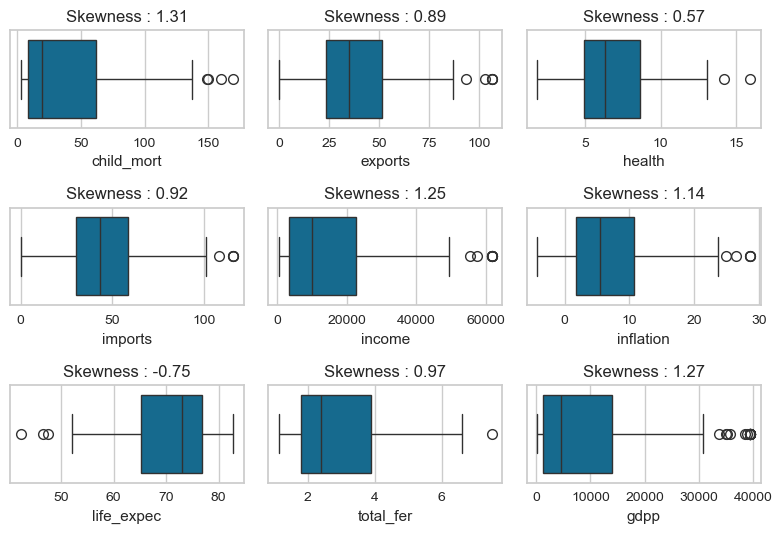

In [17]:
# boxplot
t=1
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,x=i)
    plt.title(f'Skewness : {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

In [18]:
sc=StandardScaler()
data_s=pd.DataFrame(sc.fit_transform(data),columns=data.columns)

In [19]:
data_s

child_mort   exports    health   imports    income  inflation  \
0      1.325807 -1.350898  0.287879 -0.059395 -0.908259   0.327015   
1     -0.545011 -0.536547 -0.094264  0.115438 -0.394747  -0.384140   
2     -0.273031 -0.066034 -0.977272 -0.697302 -0.211439   1.283842   
3      2.057866  1.015243 -1.467008 -0.153900 -0.643479   2.188949   
4     -0.705149  0.255182 -0.287190  0.602137  0.171226  -0.822326   
..          ...       ...       ...       ...       ...        ...   
162   -0.224735  0.304948 -0.576579  0.309173 -0.825554  -0.652799   
163   -0.532302 -0.513926 -0.702723 -1.349384  0.010754   3.083999   
164   -0.374705  1.454087  0.013330  1.608612 -0.730505   0.709171   
165    0.464112 -0.446064 -0.602550 -0.555545 -0.731122   2.361350   
166    1.145334 -0.129372 -0.339132 -0.720928 -0.805186   0.982140   

     life_expec  total_fer      gdpp  
0     -1.669872   1.902882 -0.800533  
1      0.658280  -0.859973 -0.534220  
2      0.681446  -0.038404 -0.506362  
3     -1.218141   2.128151 -0.576385  
4      0.716194  -0.541946  0.076410  
..          ...        ...       ...  
162   -0.882238   0.365754 -0.618549  
163    0.554034  -0.316678  0.174291  
164    0.287629  -0.661206 -0.743536  
165   -0.361010   1.140944 -0.743536  
166   -2.156351   1.624609 -0.732242  

[167 rows x 9 columns]

### Reduce Dataset using PCA

In [20]:
pca=PCA(n_components=9)

In [21]:
pca.fit(data_s)

PCA(n_components=9)

In [22]:
pca.explained_variance_ratio_

array([0.48163025, 0.16586924, 0.13639048, 0.09910154, 0.0655671 ,
       0.02171641, 0.0164242 , 0.0094028 , 0.00389797])

In [23]:
## Lets decide how many pc's we can use
pca.explained_variance_

array([4.36078478, 1.50181611, 1.23490898, 0.89728681, 0.59365874,
       0.1966251 , 0.14870828, 0.08513501, 0.03529306])

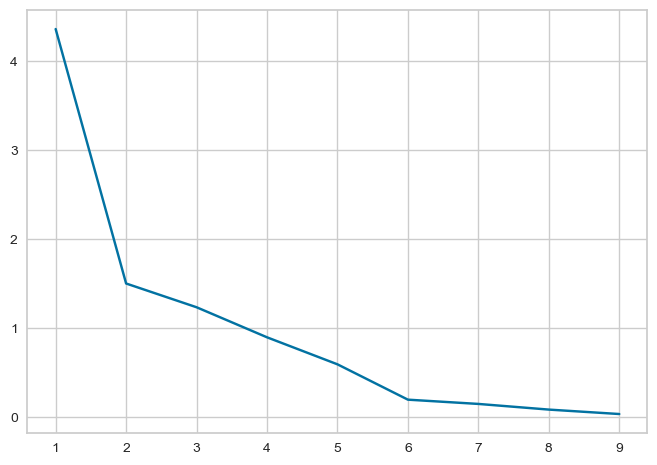

In [24]:
# scree plot

plt.plot(range(1,10),pca.explained_variance_)
plt.xticks(range(1,10))
plt.show()

In [25]:
# explained variance ratio
np.cumsum(pca.explained_variance_ratio_)

array([0.48163025, 0.6474995 , 0.78388998, 0.88299152, 0.94855862,
       0.97027503, 0.98669923, 0.99610203, 1.        ])

In [26]:
# 5 pca componet explane 94% performance
pca_final=PCA(n_components=5)
pca_data=pd.DataFrame(pca_final.fit_transform(data_s),columns=['PC1','PC2','PC3','PC4','PC5'],index=data.index)

In [27]:
pca_data.head(3)
## data of 9 columns reduced to 5 columns

PC1       PC2       PC3       PC4       PC5
country                                                      
Afghanistan -3.099217 -0.232689 -0.972447  0.787536 -0.009905
Albania      0.427427 -0.285346 -0.242571 -1.377388  0.114011
Algeria     -0.411658 -0.526613  1.634043 -0.613283  0.459962

### Implement KMeans Clustering on PCA data


In [28]:
# to decide the value of k we need elbow plot
kelbow=KElbowVisualizer(estimator=KMeans(random_state=0),k=10) 

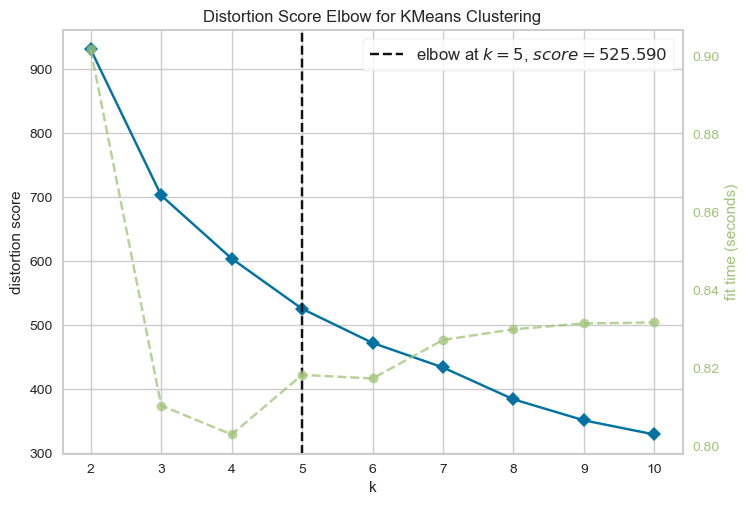

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
kelbow.fit(pca_data)
kelbow.show() 

In [30]:
# we can not fix the k only seeing the elbow plot so we go to find sihoueete score

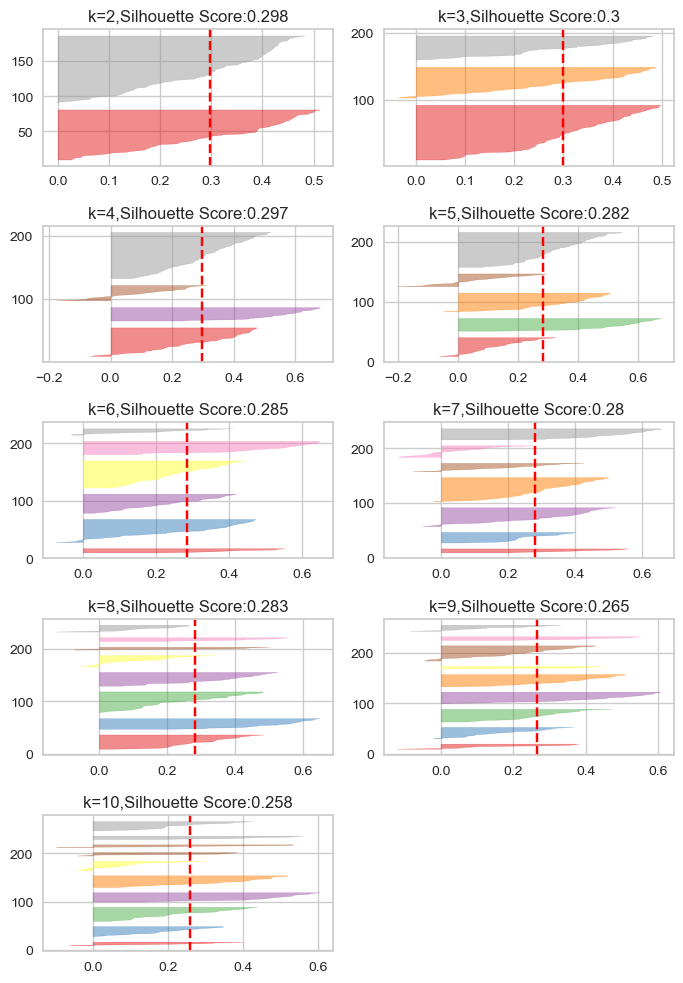

In [31]:
# Silhouette visualize
t=1
plt.figure(figsize=(7,10))
for i in range(2,11):
    plt.subplot(5,2,t)
    model= KMeans(n_clusters=i,random_state=0)
    sil_vis = SilhouetteVisualizer(model)
    sil_vis.fit(pca_data)
    plt.title(f'k={i},Silhouette Score:{round(sil_vis.silhouette_score_,3)}')
    t+=1
plt.tight_layout()
plt.show()

In [32]:
# For k=3 has highest sihoutee score so Lets go with k=3

In [33]:
kmeans_model=KMeans(n_clusters=3,random_state=0)

In [34]:
kmeans_model.fit(pca_data)

KMeans(n_clusters=3, random_state=0)

In [35]:
pred=kmeans_model.predict(pca_data)
pca_data['labels']=pred

In [36]:
pca_data.head()

PC1       PC2       PC3       PC4       PC5  labels
country                                                                      
Afghanistan         -3.099217 -0.232689 -0.972447  0.787536 -0.009905       1
Albania              0.427427 -0.285346 -0.242571 -1.377388  0.114011       0
Algeria             -0.411658 -0.526613  1.634043 -0.613283  0.459962       0
Angola              -3.217072  1.229145  1.983955  1.635771  0.159702       1
Antigua and Barbuda  1.189011  0.479460 -0.151955 -0.774114 -0.382475       0

In [37]:
data['labels']=pred

In [38]:
data.head(3)

child_mort  exports  health  imports   income  inflation  \
country                                                                 
Afghanistan        90.2     10.0    7.58     44.9   1610.0       9.44   
Albania            16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria            27.3     38.4    4.17     31.4  12900.0      16.10   

             life_expec  total_fer    gdpp  labels  
country                                             
Afghanistan        56.2       5.82   553.0       1  
Albania            76.3       1.65  4090.0       0  
Algeria            76.5       2.89  4460.0       0

### Visualize the clusters

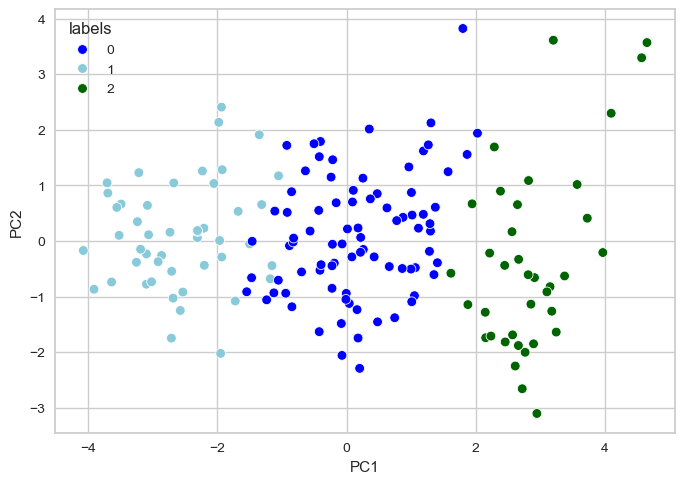

In [39]:
sns.scatterplot(data=pca_data,x='PC1',y='PC2',hue='labels',palette=['blue','c','darkgreen'])
plt.show()

In [40]:
## Centroids
centroids=kmeans_model.cluster_centers_
centroids

array([[ 0.17455918,  0.10251461,  0.17819073, -0.73377672,  0.19250403],
       [-2.56511471,  0.09977044, -0.20246215,  0.64201088, -0.15548257],
       [ 2.86681026, -0.35670063, -0.14254351,  0.83051233, -0.23432848]])

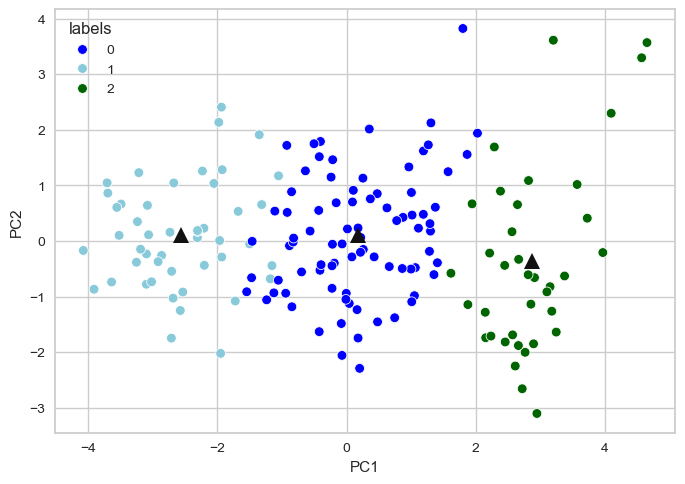

In [41]:
sns.scatterplot(data=pca_data,x='PC1',y='PC2',hue='labels',palette=['blue','c','darkgreen'])
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker='^',ms=12,color='k')
plt.show()

### Business Interpretation

In [42]:
data.head(3)

child_mort  exports  health  imports   income  inflation  \
country                                                                 
Afghanistan        90.2     10.0    7.58     44.9   1610.0       9.44   
Albania            16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria            27.3     38.4    4.17     31.4  12900.0      16.10   

             life_expec  total_fer    gdpp  labels  
country                                             
Afghanistan        56.2       5.82   553.0       1  
Albania            76.3       1.65  4090.0       0  
Algeria            76.5       2.89  4460.0       0

In [43]:
data.groupby(by='labels').mean()

child_mort    exports    health    imports        income  inflation  \
labels                                                                        
0        21.881928  40.831084  6.256867  48.136145  12293.373494   7.384446   
1        92.402128  28.225936  6.253830  41.233317   3738.574468  10.376064   
2         5.237838  52.458108  8.730541  47.971622  41360.540541   2.588432   

        life_expec  total_fer          gdpp  
labels                                       
0        72.685542   2.318554   6291.855422  
1        59.610638   4.998085   1808.297872  
2        79.956757   1.755676  34073.243243

In [44]:
data['labels']=data['labels'].map({1:'Underdeveloped',0:'Developing',2:'Developed'})

In [45]:
data.head(3)


child_mort  exports  health  imports   income  inflation  \
country                                                                 
Afghanistan        90.2     10.0    7.58     44.9   1610.0       9.44   
Albania            16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria            27.3     38.4    4.17     31.4  12900.0      16.10   

             life_expec  total_fer    gdpp          labels  
country                                                     
Afghanistan        56.2       5.82   553.0  Underdeveloped  
Albania            76.3       1.65  4090.0      Developing  
Algeria            76.5       2.89  4460.0      Developing

In [46]:
### Developed Countries
data[data['labels']=='Developed'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

In [47]:
### Developing Countries
data[data['labels']=='Developing'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana',
       'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan',
       'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya',
       'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles',
       'Solomon Islands', 'Sri Lanka', 'St. Vincent and the Grenadines',
       'Suriname', 'Ta

In [48]:
### UnderDeveloped Countries
data[data['labels']=='Underdeveloped'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea', 'Eritrea', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'],
      dtype='object', name='country')

In [49]:
## CEO focus more on developing and underdeveloped countries

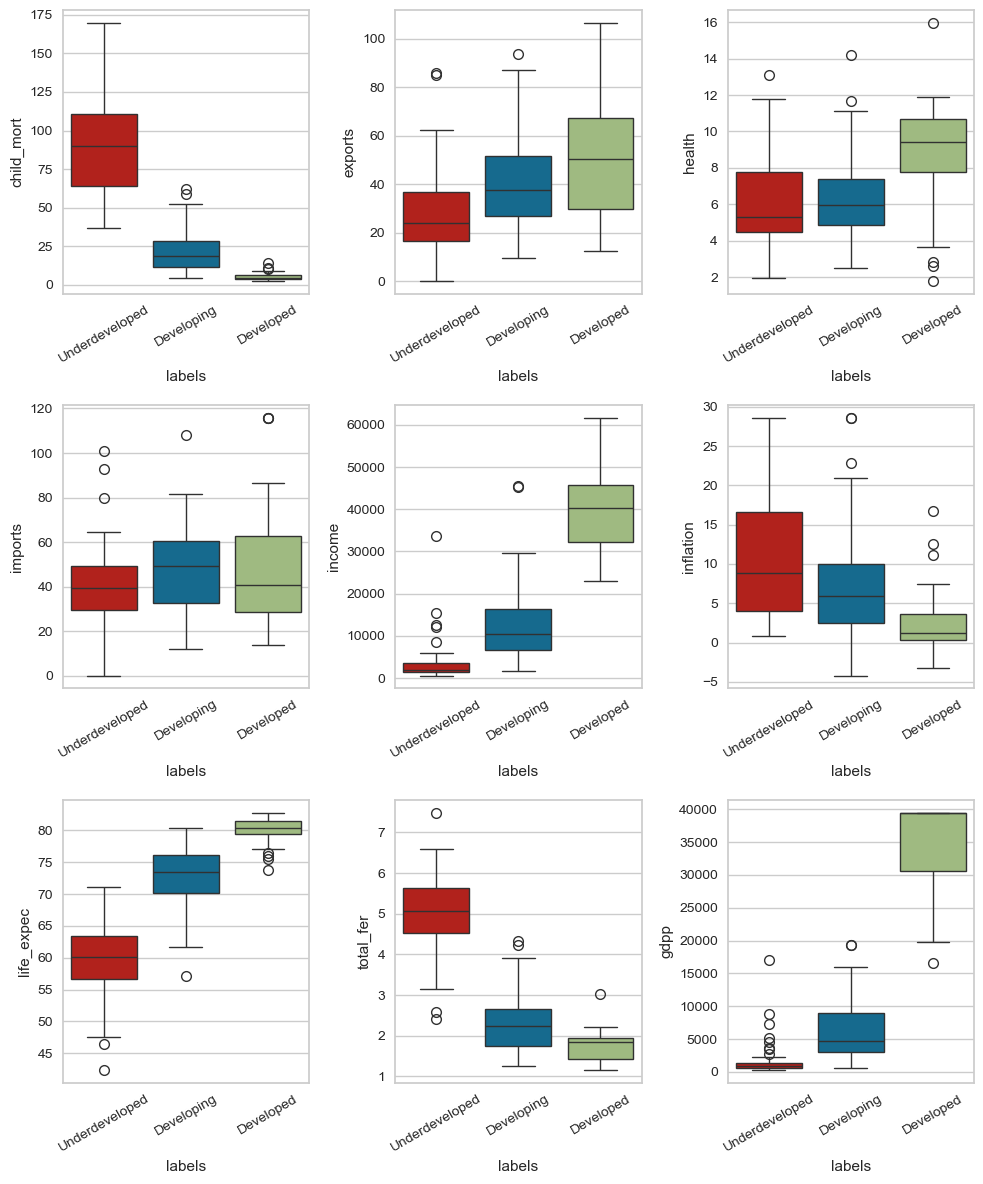

In [50]:
t=1
plt.figure(figsize=(10,12))
for i in data.select_dtypes(np.number).columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,y=i,x='labels',palette=['r','b','g'])
    plt.xticks(rotation=30)
    t+=1
plt.tight_layout()
plt.show()

In [51]:
# as we can gdp,income,child_mort,life_expec are clear the indicator that ceo should focus the  underdeveloped country that they more funds

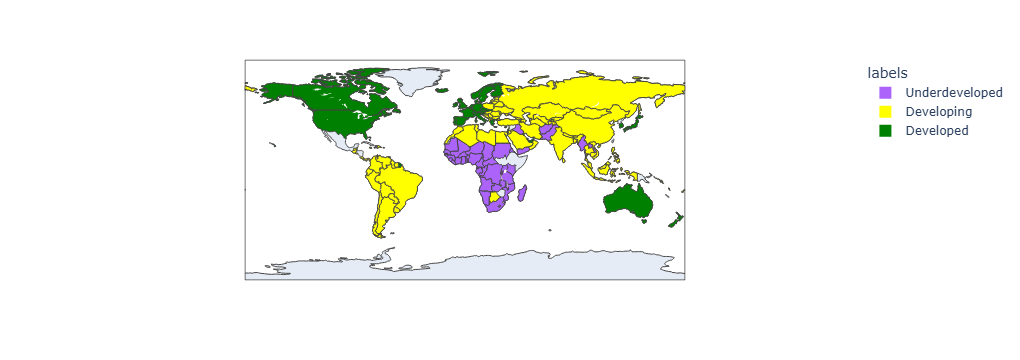

In [52]:
px.choropleth(data_frame=data,locationmode='country names',locations=data.index,color='labels',color_discrete_map={'UnderDeveloped':'red','Developed':'green','Developing':'yellow'})

In [53]:
# the country which are in blue color need more fund

## Deployment

In [59]:
import pickle

In [61]:
# create a pickle of fittied model

with open('Final_model.pkl','wb') as file:
    pickle.dump(kmeans_model,file)

In [62]:
## create a pickle of scandard scaler and pca

with open('scaler.pkl','wb') as file:
    pickle.dump(sc,file)
with open('pca.pkl','wb') as file:
    pickle.dump(pca_final,file)

In [57]:
pca_data.head(3)

PC1       PC2       PC3       PC4       PC5  labels
country                                                              
Afghanistan -3.099217 -0.232689 -0.972447  0.787536 -0.009905       1
Albania      0.427427 -0.285346 -0.242571 -1.377388  0.114011       0
Algeria     -0.411658 -0.526613  1.634043 -0.613283  0.459962       0

In [58]:
kmeans_model.predict([[-3.099217,-0.232689,-0.972447,0.787536,-0.009905]])[0]

1